# Assignment - Part I

####Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.colors as clr

In [4]:
%matplotlib inline 

## 3.1 Classification with a single-layer perceptron

### 3.1.1 Generation of lineraly-separable data

In [7]:
n=100
mA = [2,1.5]
mB = [-1.5,0]
sigmaA= 0.5
sigmaB= 0.5
p=2

# Arrays are created
classA=np.zeros((p,n))
classB=np.zeros((p,n))

classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

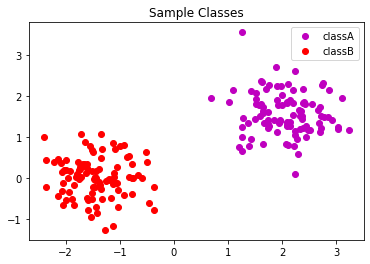

In [8]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.legend(['classA','classB'])
plt.title('Sample Classes')
plt.show()

###3.1.2 Classification with a single-layer perceptron and analysis

#### Part 1: Delta  Rule - Perceptron Learning in Batch Mode

#####Delta Rule

In [82]:
eta=0.0001
epochs=400

In [23]:
# Delta Rule (X:input matrix, T:target matrix, W:weight matrix)
def delta_rule(X, T, W,eta,epochs):
  errors_cost=[]
  for i in range(epochs):
    error=W.dot(X)-T
    correction = -eta*error.dot(X.T)
    W = W + correction  
    errors_cost.append(np.mean(np.square(error))) # save error cost values
  return W,errors_cost

In [98]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,2*n))))
targets=np.concatenate((np.ones(100),-np.ones(100)))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1) # weight intialization

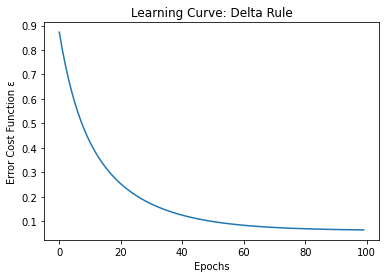

In [8]:
plt.plot(delta_rule(patterns,targets,weights,eta=0.0001,epochs=100)[1])
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title("Learning Curve: Delta Rule")
plt.show()

In [9]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [18]:
x=np.linspace(-3,3,1000)

In [11]:
# Classes separation line
y1=(-1/w2)*(w1*x+w3)

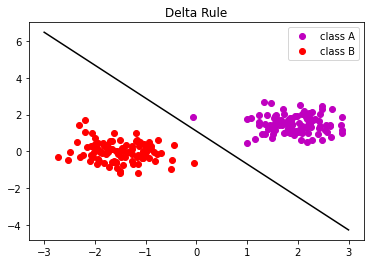

In [12]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y1,'k-')
plt.legend(['class A','class B'])
plt.title("Delta Rule")
plt.show()

#####Percerptron Learning

In [13]:
epochs=2000
eta=0.001

In [12]:
def perceptron_learning(X, T, W,eta,epochs):
  errors_list=[]
  for i in range(epochs):
    Y=W.dot(X)
    for k in range(np.shape(Y)[1]):
      if Y[0][k]>=0 and T[k]<0:
        W=W-eta*X[:,k]
      if Y[0][k]<0 and T[k]>0:
        W=W+eta*X[:,k]
    error=T-Y
    errors_list.append(np.mean(np.square(error)))
  return W,errors_list

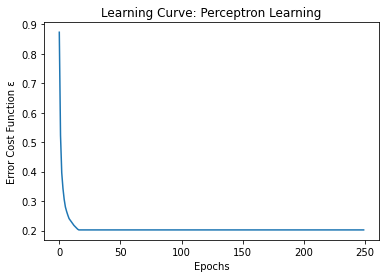

In [15]:
plt.plot(perceptron_learning(patterns,targets,weights,eta=0.001,epochs=250)[1])
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title("Learning Curve: Perceptron Learning")
plt.show()

In [16]:
w1=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][0]
w2=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][1]
w3=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][2]

In [17]:
y2=(-1/w2)*(w1*x+w3)

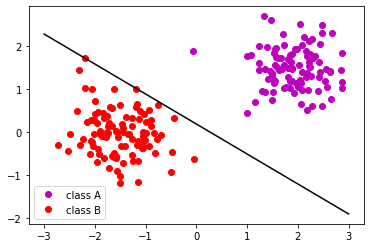

In [18]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y2,'k-')
plt.legend(['class A','class B'])
plt.show()

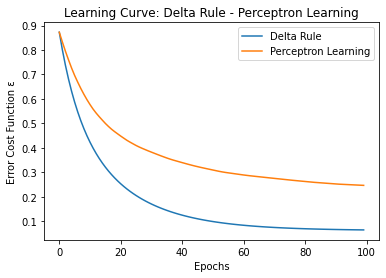

In [19]:
plt.plot(delta_rule(patterns,targets,weights,eta=0.0001,epochs=100)[1])
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title("Learning Curve: Delta Rule - Perceptron Learning")
plt.plot(perceptron_learning(patterns,targets,weights,eta=0.0001,epochs=100)[1])
plt.legend(['Delta Rule','Perceptron Learning'])
plt.show()

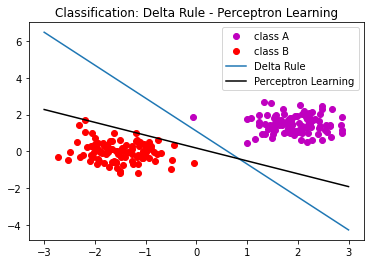

In [20]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y1)
plt.plot(x,y2,'k-')
plt.legend(['class A','class B','Delta Rule','Perceptron Learning'])
plt.title('Classification: Delta Rule - Perceptron Learning')
plt.show()

**Conclusions**

**Eta**: 0.0001 seems to be an appropriate value for both algorithms to both converge at around 100-200 epochs. If much a greater value is aplied the error diverges. If smaller value is applied the convergence of the algorithms is slowed down.

**Comparisson**: Delta Rule Learning is prefferable because converges a lot faster even with lower learning rate and also because the decision boundary of Perceptron Learning is close to the limit points.



#### Part 2: Sequential-Batch Learning with Delta Learning Rule

In [99]:
epochs=1000
eta=0.0001

In [21]:
def sequential_delta_rule(X, T, W,eta,epochs):
  errors_cost=[]
  for i in range(epochs):
    for k in range(np.shape(T)[0]):
      tmp=[]
      error=W.dot(X[:,k])-T[k]
      tmp.append(error**2)
      W=W-eta*error*X[:,k].T
    errors_cost.append(np.mean(tmp))
  return W,errors_cost

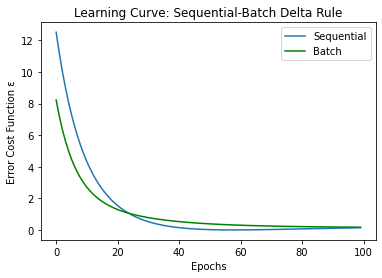

In [101]:
plt.plot(sequential_delta_rule(patterns,targets,weights,eta,epochs=100)[1])
plt.plot(delta_rule(patterns,targets,weights,eta,epochs=100)[1],'g')
plt.legend(['Sequential','Batch'])
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title('Learning Curve: Sequential-Batch Delta Rule')
plt.show()

In [102]:
w1=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [103]:
w4=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w5=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w6=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [104]:
y=(-1/w2)*(w1*x+w3)

In [105]:
y2=(-1/w5)*(w4*x+w6)

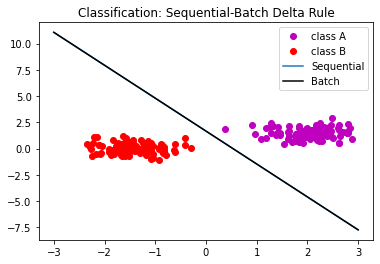

In [106]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y)
plt.plot(x,y2,'k-')
plt.legend(['class A','class B','Sequential','Batch'])
plt.title('Classification: Sequential-Batch Delta Rule')
plt.show()

**Conclusions**

Depending on the initialisation and for a learning rate of 0.0001 both versions of the algorithm converge at around 20-40 epochs with the sequential version converging quicker and achieving lower error cost. Differents random initialisations may change the speed of convergence of the algorithms but the order seems to remain the same.

#### Part 3: Removing Bias: Delta Rule

In [31]:
mA = [2,1.5]
mB = [-1.5,0]

classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

In [32]:
patterns=np.concatenate((classA,classB),axis=1)
weights=np.random.randn(1, p)
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]

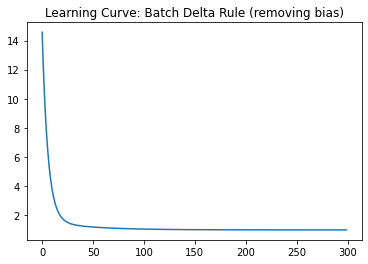

In [33]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs=300)[1])
plt.title('Learning Curve: Batch Delta Rule (removing bias)')
plt.show()

In [34]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]

In [35]:
y=x*(-w1/w2)

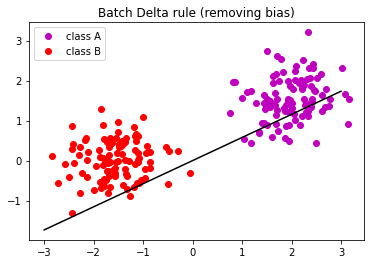

In [36]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta rule (removing bias)')
plt.show()

As the boundary goes through the origin, the perceptron will not be able to classify all the samples if one of the class has a mean which is almost the origin.
For example setting mA to [0,0] proves our statement:

In [37]:
mA = [0,0]
mB = [-2.5,0]

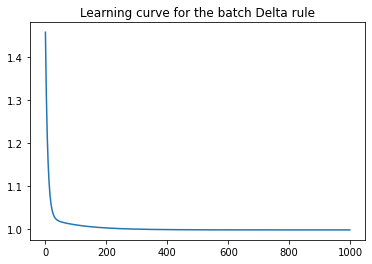

In [38]:
classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]
patterns=np.concatenate((classA,classB),axis=1)
weights=np.random.randn(1, p)
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [39]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]

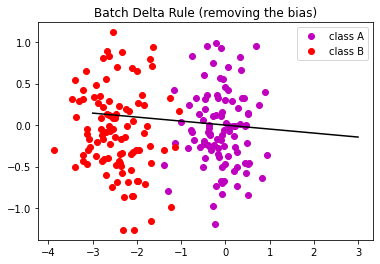

In [40]:
y=x*(-w1/w2)
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta Rule (removing the bias)')
plt.show()

**Conclusions**

Having removed the bias the perceptron is not be able to classify the samples if one of the class has a mean which is almost the origin, even after as many as 1000 epochs. The error will not converge to 0 and the perceptron is not able to classify correctly the sample from one or both of the classes.

###3.1.3 Classification of samples that are not linearly separable

####Part 1: Perceptron Learning, Batch Delta Rule, Sequential Delta Rule

##### Dataset Generation

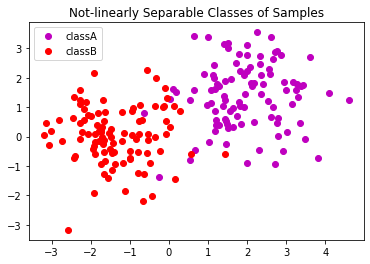

In [45]:
mA = [2,1.5]
mB = [-1.5,0]
sigmaA=1
sigmaB=1

classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

np.random.shuffle(classA)
np.random.shuffle(classB)

plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.legend(['classA','classB'])
plt.title('Not-linearly Separable Classes of Samples')
plt.show()

In [46]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,2*n))))
targets=np.concatenate((np.ones(100),-np.ones(100)))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

#####Perceptron Learning

In [47]:
epochs=300
eta=0.0001

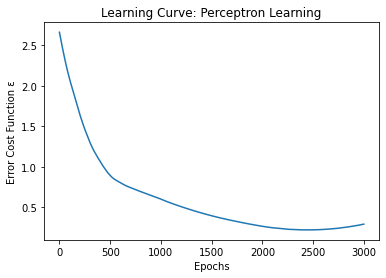

In [48]:
plt.plot(perceptron_learning(patterns,targets,weights,eta,epochs=3000)[1])
plt.title('Learning Curve: Perceptron Learning')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.show()

In [49]:
w1=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][0]
w2=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][1]
w3=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][2]

In [50]:
y1=(-1/w2)*(w1*x+w3)

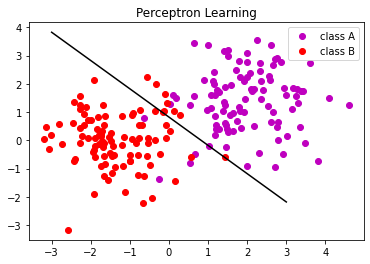

In [51]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y1,'k-')
plt.legend(['class A','class B'])
plt.title('Perceptron Learning')
plt.show()

#####Sequential Delta Rule

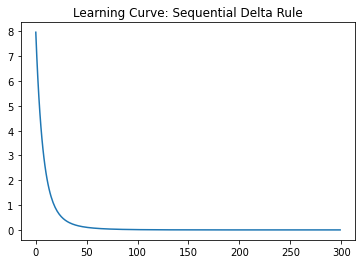

In [52]:
plt.plot(sequential_delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning Curve: Sequential Delta Rule')
plt.show()

In [53]:
w1=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [54]:
y2=(-1/w2)*(w1*x+w3)

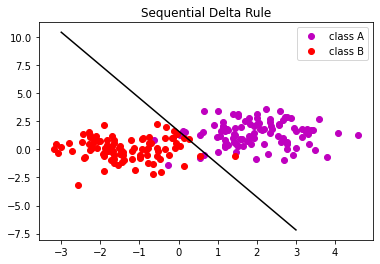

In [55]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y2,'k-')
plt.legend(['class A','class B'])
plt.title('Sequential Delta Rule')
plt.show()

#####Batch Delta Rule

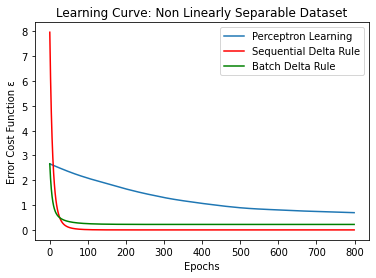

In [56]:
plt.plot(perceptron_learning(patterns,targets,weights,eta,epochs=800)[1])
plt.plot(sequential_delta_rule(patterns,targets,weights,eta,epochs=800)[1],'r')
plt.plot(delta_rule(patterns,targets,weights,eta,epochs=800)[1],'g')
plt.title('Learning Curve: Non Linearly Separable Dataset')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.legend(['Perceptron Learning','Sequential Delta Rule','Batch Delta Rule'])
plt.show()

In [57]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [58]:
y3=(-1/w2)*(w1*x+w3)

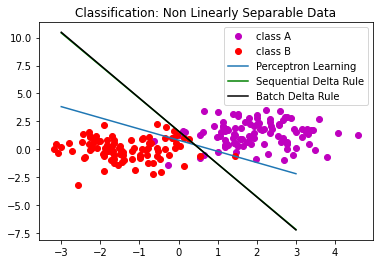

In [59]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y1)
plt.plot(x,y2,'g-')
plt.plot(x,y3,'k-')
plt.legend(['class A','class B','Perceptron Learning','Sequential Delta Rule','Batch Delta Rule'])
plt.title('Classification: Non Linearly Separable Data')
plt.show()

**Conclusions**

Firstly, Perceptron Learning is significantly slower than both versions of Delta Rule. Also Sequential Delta Rule converges to lower error cost and quicker than the other 2 implementations.

#### Part 2: Different versions of linearly non-separable dataset

#####Generating the dataset

In [122]:
ndata=100
epochs=2000

classA=np.zeros((p,ndata))
classB=np.zeros((p,ndata))

mA= [1, 0.3]
mB= [0, -0.1]
sigmaA=0.2
sigmaB=0.3
classA[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0]= np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1]= np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1]= np.random.randn(1,ndata)*sigmaB +mB[1]
classA=classA.T
classB=classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA=classA.T
classB=classB.T

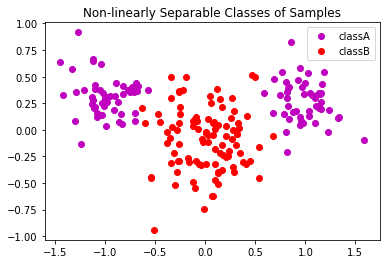

In [123]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.legend(['classA','classB'])
plt.title('Non-linearly Separable Classes of Samples')
plt.show()

#####Whole Dataset

In [124]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(int(0.5*np.shape(patterns)[1])),-np.ones(int(0.5*np.shape(patterns)[1]))))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

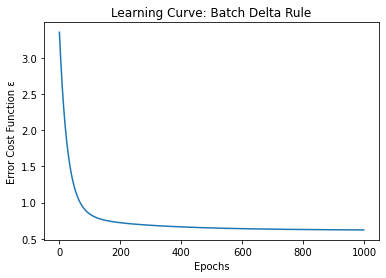

In [125]:
lc1=delta_rule(patterns,targets,weights,eta,epochs=1000)[1]
plt.plot(lc1)
plt.title('Learning Curve: Batch Delta Rule')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.show()

In [126]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [127]:
y1=(-1/w2)*(w1*x+w3)

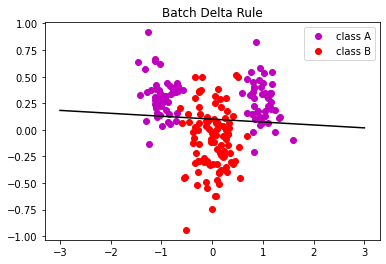

In [128]:
plt.plot(classA[0],classA[1],'mo')
plt.plot(classB[0],classB[1],'ro')
plt.plot(x,y1,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta Rule')
plt.show()

#####1st Scenario: Removing 25% from each class

In [129]:
classA_prime=classA[:,:int(0.75*ndata)]
classB_prime=classB[:,:int(0.75*ndata)]

In [130]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(int(0.5*np.shape(patterns)[1])),-np.ones(int(0.5*np.shape(patterns)[1]))))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

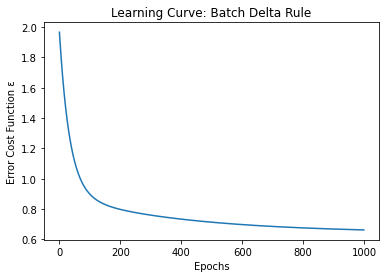

In [131]:
lc2=delta_rule(patterns,targets,weights,eta,epochs=1000)[1]
plt.plot(lc2)
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title('Learning Curve: Batch Delta Rule')
plt.show()

In [132]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [133]:
y=(-1/w2)*(w1*x+w3)

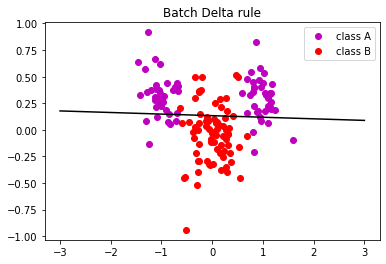

In [134]:
plt.plot(classA_prime[0],classA_prime[1],'mo')
plt.plot(classB_prime[0],classB_prime[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta rule')
plt.show()

When we remove 25% of each class, the decision boundary remains the same and the algorithm converges in the same number of epochs.

##### 2nd Scenario: Removing random 50% from classA

In [135]:
classA_prime=classA[:,:int(0.5*ndata)]
classB_prime=classB

In [136]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

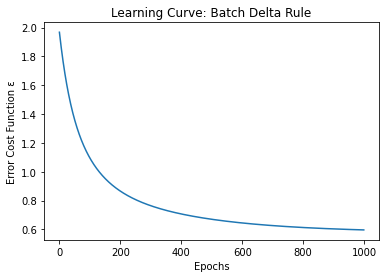

In [137]:
lc3=delta_rule(patterns,targets,weights,eta,epochs=1000)[1]
plt.plot(lc3)
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.title('Learning Curve: Batch Delta Rule')
plt.show()

In [138]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [139]:
y=(-1/w2)*(w1*x+w3)

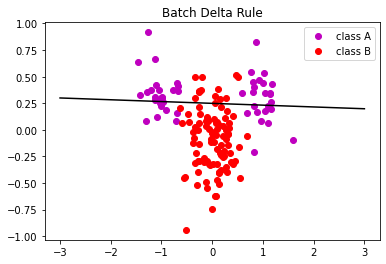

In [140]:
plt.plot(classA_prime[0],classA_prime[1],'mo')
plt.plot(classB_prime[0],classB_prime[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta Rule')
plt.show()

If we remove 50% of the samples of one class, the decision boundary has changed a little bit and the algorithm is a bit slower.

#####3rd Scenario: Removing random 50% from classB

In [141]:
classA_prime=classA
classB_prime=classB[:,:int(0.5*ndata)]

In [142]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

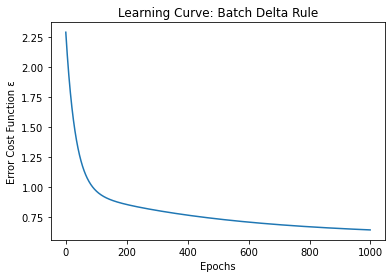

In [143]:
lc4=delta_rule(patterns,targets,weights,eta,epochs=1000)[1]
plt.plot(lc4)
plt.title('Learning Curve: Batch Delta Rule')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.show()

In [144]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [145]:
y=(-1/w2)*(w1*x+w3)

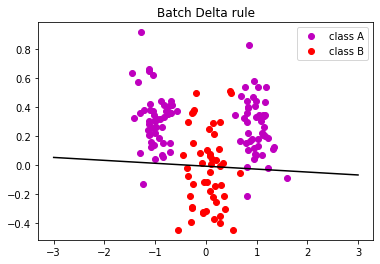

In [146]:
plt.plot(classA_prime[0],classA_prime[1],'mo')
plt.plot(classB_prime[0],classB_prime[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta rule')
plt.show()

Now the decision boundary is the opposite from the previous scenario, but the algorithm still cannot classify correctly the samples.

#####4th Scenario: Removing 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [147]:
j=0
k=0
neg=np.zeros([2,ndata])
pos=np.zeros([2,ndata])
for i in range(np.shape(classA)[1]):
  if classA[0][i] <0:
    neg[:,j]=classA[:,i]
    j+=1
  else:
    pos[:,k]=classA[:,i]
    k+=1
pos=pos[:,:k]
neg=neg[:,:j]
pos=pos[:,:int(0.2*np.shape(pos[:,:50])[1])]
neg=neg[:,:int(0.8*np.shape(neg[:,:50])[1])]
classA_prime=np.concatenate((pos,neg),axis=1)
classB_prime=classB

In [148]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

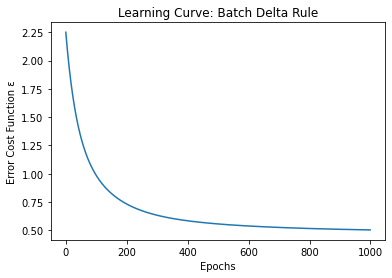

In [149]:
lc5=delta_rule(patterns,targets,weights,eta,epochs=1000)[1]
plt.plot(lc5)
plt.title('Learning Curve: Batch Delta Rule')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.show()

In [150]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [151]:
y=(-1/w2)*(w1*x+w3)

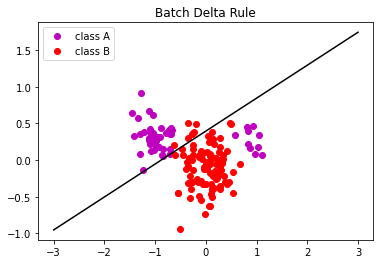

In [152]:
plt.plot(classA_prime[0],classA_prime[1],'mo')
plt.plot(classB_prime[0],classB_prime[1],'ro')
plt.plot(x,y,'k-')
plt.legend(['class A','class B'])
plt.title('Batch Delta Rule')
plt.show()

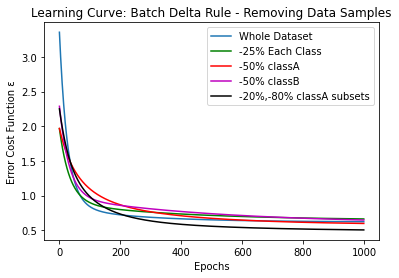

In [154]:
plt.plot(lc1)
plt.plot(lc2,'g')
plt.plot(lc3,'r')
plt.plot(lc4,'m')
plt.plot(lc5,'k')
plt.title('Learning Curve: Batch Delta Rule - Removing Data Samples')
plt.xlabel("Epochs")
plt.ylabel("Error Cost Function ε")
plt.legend(['Whole Dataset','-25% Each Class','-50% classA','-50% classB','-20%,-80% classA subsets'])
plt.show()

Now the decision boundary is totally different. Indeed we have almost removed all the samples from class A which had a positive abscissa  so the dataset is now almost linearly separable. 

**Conclusions**

If the sampling of the whole dataset is biased, the generalisation will not be correct and predictions for sample that were not represented will be wrong.